# Attribute Information:

FullDate: Date in format yyyy-mm-dd  hh:mm:ss

ElecPrice: Prices of electricity charged in Kw per hour

Gas Price: power generated was done via a gas power plant, gas price is the price of gas at time-T

SysLoad: Total Load on system or Power consumed at time-T 

Tmax: maximum temperature at time-T

In [1]:
# IMPORTING THE NECCESSARY PACKAGES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# installing the neccessary tools

!pip install pystan==2.19.1.1 --quiet
!pip install fbprophet --quiet

from fbprophet import Prophet
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller

import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING) 

In [3]:

df=pd.read_csv( "https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv" )

In [4]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [5]:
df.shape


(92016, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [7]:
ts =df.copy()

In [8]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [9]:
ts.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [10]:
# convert the timestamp to pandas datetime
ts['FullDate']= pd.to_datetime(ts['FullDate'])
ts.set_index('FullDate', inplace=True)

In [11]:
# Resample the data from an hour sampling rate to a daily sampling rate (sum over the hours for each day)
df_daily = ts.resample('D').sum()
df_daily.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


Plot of ElecPrice over time


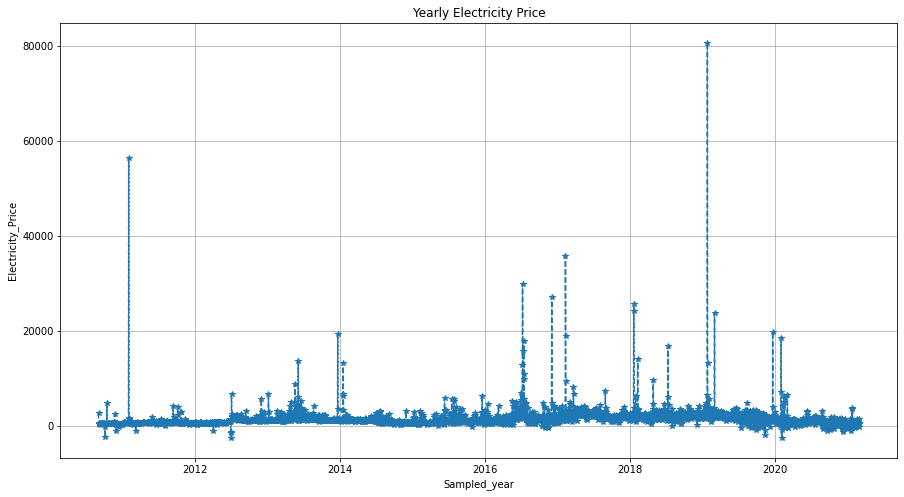

In [12]:
plt.figure(figsize=(15, 8))
plt.plot(df_daily.index, df_daily.ElecPrice, '--', marker='*')
plt.grid()
plt.xlabel('Sampled_year')
plt.ylabel('Electricity_Price')
plt.title('Yearly Electricity Price')
plt.show()

In [13]:
sys_dt = df_daily.SysLoad
gasprice_data = df_daily.GasPrice

# Augumented Dickey Fuller (ADF) test on sys_load data
sys_res = adfuller(sys_dt)
pvalue_adf1 = sys_res[1]

# Augumented Dickey Fuller (ADF) test on gas_price data
gas_res = adfuller(gasprice_data)
pvalue_adf2 = gas_res[1]

# print the p-values of the variables
print("P-value for SysLoad: {:.6f}".format(pvalue_adf1))
print("P-value for GasPrice: {:.6f}".format(pvalue_adf2))

P-value for SysLoad: 0.004254
P-value for GasPrice: 0.045027


In [14]:
sys_data = df_daily.SysLoad
gasprice_data = df_daily.GasPrice

# Augumented Dickey Fuller (ADF) test on sys_load data
sys_res = adfuller(sys_data)
pvalue_adf1 = sys_res[1]

# Augumented Dickey Fuller (ADF) test on gas_price data
gas_res = adfuller(gasprice_data)
pvalue_adf2 = gas_res[1]

# print the p-values of the variables
print("P-value for SysLoad: {:.6f}".format(pvalue_adf1))
print("P-value for GasPrice: {:.6f}".format(pvalue_adf2))

P-value for SysLoad: 0.004254
P-value for GasPrice: 0.045027


In [15]:
elec_data = df_daily.ElecPrice


gas_res = adfuller(gasprice_data, maxlag=None, regression='c', autolag='AIC')
gas_cv = gas_res[4]

elec_res = adfuller(elec_data, maxlag=None, regression='c', autolag='AIC')
elec_cv = elec_res[4]

print("Critical Values for GasPrice:")
print("1%: {:.4f}".format(gas_cv['1%']))
print("5%: {:.4f}".format(gas_cv['5%']))
print("10%: {:.4f}".format(gas_cv['10%']))

print('---------------------------------')

print("Critical Values for ElecPrice:")
print("1%: {:.4f}".format(elec_cv['1%']))
print("5%: {:.4f}".format(elec_cv['5%']))
print("10%: {:.4f}".format(elec_cv['10%']))

Critical Values for GasPrice:
1%: -3.4321
5%: -2.8623
10%: -2.5672
---------------------------------
Critical Values for ElecPrice:
1%: -3.4321
5%: -2.8623
10%: -2.5672


Univariate Analysis

In [16]:
# Make a copy
df_U = df_daily.copy()

In [17]:
df_U = df_U.reset_index().rename({'FullDate': 'ds', 'ElecPrice': 'y'}, axis=1)
df_U.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [18]:
# Split the data into Train and Test
data = (len(df_daily) - 2757)

train_uni = df_U[:-data]
test_uni= df_U[-data:]

In [19]:
train_uni.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [20]:
test_uni.tail()

,ds,Tmax,SysLoad,GasPrice,y
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980
3833,2021-02-28,583.2,6675.05485,131.6352,-98.985


In [21]:
train_uni.tail()

,ds,Tmax,SysLoad,GasPrice,y
2752,2018-03-15,609.6,27139.02585,220.6272,2717.340
2753,2018-03-16,648.0,19710.46400,216.9600,2277.335
2754,2018-03-17,724.8,1079.34705,209.0400,1718.385
2755,2018-03-18,508.8,-4102.43795,203.9880,1088.015
2756,2018-03-19,561.6,8731.39945,199.2720,1998.305


In [22]:
test_uni.head()

,ds,Tmax,SysLoad,GasPrice,y
2757,2018-03-20,540.0,7696.91130,201.5880,1833.00
2758,2018-03-21,571.2,4658.05865,203.2560,1730.49
2759,2018-03-22,722.4,19161.78525,203.2560,2260.55
2760,2018-03-23,811.2,18090.43435,198.6456,2138.76
2761,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [23]:
model_uni = Prophet(daily_seasonality=True)
model_uni.fit(train_uni)

In [24]:
pred_univ = model_uni.make_future_dataframe(periods=len(test_uni), freq='D')
pred_univ.head()

,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05


In [25]:
forecast_uni = model_uni.predict(pred_univ)

In [26]:
# check the forecast length
print(len(forecast_uni))

# See only the forecasting columns
print(forecast_uni[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

3834
          ds         yhat   yhat_lower   yhat_upper
0 2010-09-01  1007.497099 -1226.798905  3437.176831
1 2010-09-02  1087.534056 -1263.459250  3552.632699
2 2010-09-03   862.231255 -1588.583671  3183.094617
3 2010-09-04   521.643579 -1785.577965  2961.317437
4 2010-09-05   431.413122 -1877.674963  2867.811194


In [27]:
def Mape(y_true, y_pred):
    return (np.mean(np.abs((y_true - y_pred) / y_true))) * 100
    
y_true = test_uni['y'].values
y_pred = forecast_uni['yhat'][-data:].values

mape = round(Mape(y_true, y_pred), 2)
print(f'mape of Univariate model: {mape}')  

mape of Univariate model: 544.88


In [28]:
# univariate model RMSE in 2 decimal places
rmse = round(np.sqrt(mean_squared_error(y_true, y_pred)), 2)
print(f'RMSE of univariate model: {rmse}')

RMSE of univariate model: 3209.0


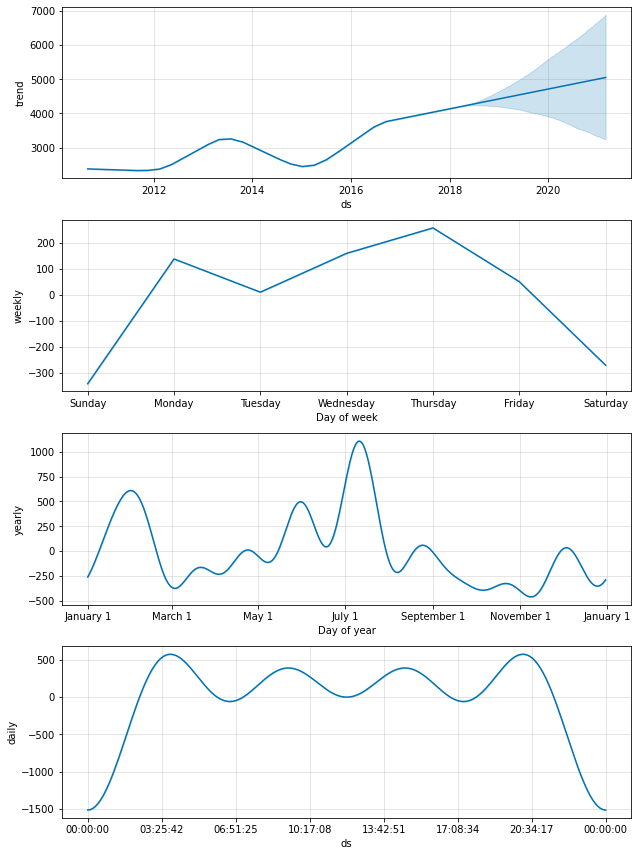

In [29]:
# plots component of the forecast
model_uni.plot_components(forecast_uni)
plt.show()

Multivariate Analysis

In [30]:
multivariate_df = df_daily.reset_index()[['FullDate','SysLoad','Tmax','GasPrice','ElecPrice']].rename(
    {'FullDate':'ds', 'SysLoad':'add1', 'Tmax':'add2', 'GasPrice':'add3', 'ElecPrice':'y'}, axis=1
)
multivariate_df.head()

,ds,add1,add2,add3,y
0,2010-09-01,41565.380,379.2,88.56,2751.700
1,2010-09-02,38898.990,369.6,88.56,570.810
2,2010-09-03,41665.760,439.2,106.80,504.975
3,2010-09-04,35638.085,328.8,81.36,502.275
4,2010-09-05,35611.410,357.6,106.80,500.555


In [31]:
# split the data_with_regressors dataset
train_mult = multivariate_df[:2757]
test_mult = multivariate_df[2757:]

In [32]:
model_mul = Prophet(daily_seasonality=True)

# add regressors to the models
model_mul.add_regressor('add1')
model_mul.add_regressor('add2')
model_mul.add_regressor('add3')

In [33]:
model_mul.fit(train_mult)

In [34]:
pred_mul = model_mul.make_future_dataframe(periods=len(test_mult), freq='D')

In [35]:
pred_mul['add1'] = multivariate_df['add1']
pred_mul['add2'] = multivariate_df['add2']
pred_mul['add3'] = multivariate_df['add3']
pred_mul

,ds,add1,add2,add3
0,2010-09-01,41565.38000,379.2,88.5600
1,2010-09-02,38898.99000,369.6,88.5600
2,2010-09-03,41665.76000,439.2,106.8000
3,2010-09-04,35638.08500,328.8,81.3600
4,2010-09-05,35611.41000,357.6,106.8000
...,...,...,...,...
3829,2021-02-24,-1525.49745,537.6,134.4000
3830,2021-02-25,4539.07855,518.4,130.5048
3831,2021-02-26,9517.02430,547.2,130.1808
3832,2021-02-27,4932.88015,564.0,130.0800


In [36]:
# forecast using the extra-regressors as predictors
forecast2 = model_mul.predict(pred_mul)
print(forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds         yhat   yhat_lower   yhat_upper
0 2010-09-01  1503.110918  -681.710173  3662.963816
1 2010-09-02  1454.791417  -877.971722  3547.700275
2 2010-09-03  1684.618676  -777.663279  3685.994762
3 2010-09-04   899.308455 -1363.224646  3016.775951
4 2010-09-05  1316.933592 -1014.078308  3497.086901


In [37]:
y_true = test_mult['y'].values
y_pred = forecast2['yhat'][2757:].values

mape1 = round(Mape(y_true, y_pred), 2)
print(f'MAPE of Multivariate model: {mape1}')

MAPE of Multivariate model: 233.43


In [38]:
# RMSE of multivariate model in 2 decimal places
rmse = round(np.sqrt(mean_squared_error(y_true, y_pred)), 2)
print(f'RMSE of Multivariate model: {rmse}')

RMSE of Multivariate model: 2709.32


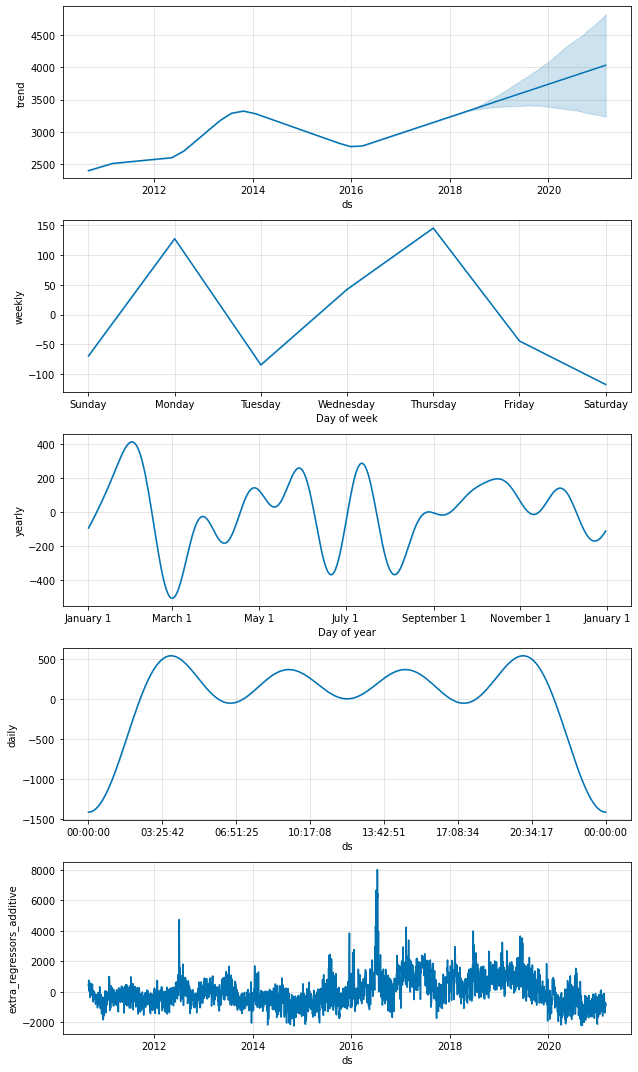

In [39]:
# plots component of the forecast
model_mul.plot_components(forecast2)
plt.show()

Drop Tmax from the table


In [40]:
df_train = train_mult.drop(['add2'], axis=1)
df_train.head()

,ds,add1,add3,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [41]:
model = Prophet(daily_seasonality=True)
model.add_regressor('add1')
model.add_regressor('add3')

In [42]:
model.fit(df_train)

In [43]:
pred = model.make_future_dataframe(periods=len(test_mult), freq='D')

In [44]:
data_3 = df_daily.reset_index()[['FullDate','SysLoad','GasPrice','ElecPrice']].rename(
    {'FullDate':'ds', 'SysLoad':'add1', 'GasPrice':'add3', 'ElecPrice':'y'}, axis=1
)
data_3.head()

,ds,add1,add3,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [45]:
pred['add1'] = data_3['add1']
pred['add3'] = data_3['add3']
pred

,ds,add1,add3
0,2010-09-01,41565.38000,88.5600
1,2010-09-02,38898.99000,88.5600
2,2010-09-03,41665.76000,106.8000
3,2010-09-04,35638.08500,81.3600
4,2010-09-05,35611.41000,106.8000
...,...,...,...
3829,2021-02-24,-1525.49745,134.4000
3830,2021-02-25,4539.07855,130.5048
3831,2021-02-26,9517.02430,130.1808
3832,2021-02-27,4932.88015,130.0800


In [46]:
forecast = model.predict(pred)


In [47]:
y_true = test_mult['y'].values
y_pred = forecast['yhat'][2757:].values

mape = round(Mape(y_true, y_pred), 2)
print(f'MAPE of Multivariate model without Tmax: {mape}')

MAPE of Multivariate model without Tmax: 237.37
